In [1]:
# dependencies
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import random

In [2]:
# dependencies for OpenWeatherMap API
import json
import requests
from config import api_key
import numpy as np

In [4]:
# config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
appid = api_key
settings = {"units": "imperial", "appid": api_key}
query_url = f"{url}appid={api_key}&units={units}&q="
# query_url

'http://api.openweathermap.org/data/2.5/weather?appid=cb0f4478220431ff8da62d9f9d9102fc&units=imperial&q='

In [5]:
#create empty lists
citylist = []
count = 0
dups = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = citipy.nearest_city(x, y)
        city_dict = {}
        city_dict['city'] = city.city_name
        city_dict['country'] = city.country_code
        city_dict['lat'] = x
        city_dict['long'] = y
        if len(citylist) == 0:
            citylist.append(city_dict)
            count+=1
            continue
        else:
            # no dupes
            for city in citylist:
                if city['city'] == city_dict['city']:
                    dups = 'yes'
        if dups == 'no':
            citylist.append(city_dict)
            count+=1
        else:
            dups = 'no'

print(len(citylist))

7957


In [9]:
# get 50, then later 500 random cities / use list comprehension
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

# test city 45
# print(citylist[45])

{'city': 'waipawa', 'country': 'nz', 'lat': -49, 'long': 179}


In [17]:
count = 0
weather_json = []

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = requests.get(query_url)
        cityweather = weather_response.json()
        weather_json.append(cityweather)
        city1 = data.get("name")
        city.append(city1)
        country1 = data.get("sys").get("country")
        country.append(country1)
    except:
        #print(f"No data for this city: {row['city']}")
        print(f"Processing Record {count}/50 | {row['city']}")
        print(query_url)

print("-"*47)
print("                Data Collected")
print("-"*47)

Processing Record 1/50 | sukhoy log
http://api.openweathermap.org/data/2.5/weather?appid=cb0f4478220431ff8da62d9f9d9102fc&units=imperial&q=sukhoy log
Processing Record 2/50 | baijiantan
http://api.openweathermap.org/data/2.5/weather?appid=cb0f4478220431ff8da62d9f9d9102fc&units=imperial&q=baijiantan
Processing Record 3/50 | chapais
http://api.openweathermap.org/data/2.5/weather?appid=cb0f4478220431ff8da62d9f9d9102fc&units=imperial&q=chapais
Processing Record 4/50 | romny
http://api.openweathermap.org/data/2.5/weather?appid=cb0f4478220431ff8da62d9f9d9102fc&units=imperial&q=romny
Processing Record 5/50 | can
http://api.openweathermap.org/data/2.5/weather?appid=cb0f4478220431ff8da62d9f9d9102fc&units=imperial&q=can
Processing Record 6/50 | santa comba
http://api.openweathermap.org/data/2.5/weather?appid=cb0f4478220431ff8da62d9f9d9102fc&units=imperial&q=santa comba
Processing Record 7/50 | yongzhou
http://api.openweathermap.org/data/2.5/weather?appid=cb0f4478220431ff8da62d9f9d9102fc&units=im

In [18]:
# create place to store lists
city = []
country = []
latitude = []
longtitude = []

temperature = []
humidity = []

cloudiness = []
wind_speed = []
max_temp = []

In [19]:
for data in weather_json:
    try:
        weather_response = requests.get(query_url)
        cityweather = weather_response.json()
        lat1 = data.get("coord").get("lat")
        latitude.append(lat1)
        temp1 = data.get("main").get("temp")
        temperature.append(temp1)
        city1 = data.get("name")
        city.append(city1)
        country1 = data.get("sys").get("country")
        country.append(country1)
        humid1 = data.get("main").get("humidity")
        humidity.append(humid1)
        cloud1 = data.get("clouds").get("all")
        cloudiness.append(cloud1)
        wind1 = data.get("wind").get("speed")
        wind_speed.append(wind1)
        long1 = data.get("coord").get("lon")
        longtitude.append(long1)
        temps1 = data.get("main").get("temp_max")
        max_temp.append(temps1)
        
    except:
        pass

    continue

weather_dict = {"city":city, "Country":country, "Temperature (F)": temperature, "Latitude": latitude, "Longitude":longtitude,
                "Humidity": humidity, "Cloudiness":cloudiness,"Wind Speed":wind_speed, "Max_Temp":max_temp}
weather_df = pd.DataFrame(weather_dict)
weather_df.head(10)

,Cloudiness,Country,Humidity,Latitude,Longitude,Max_Temp,Temperature (F),Wind Speed,city
0,48,RU,70,56.90,62.03,4.41,4.41,2.64,Sukhoy Log
1,36,CN,78,45.63,85.18,47.66,47.66,2.64,Baijiantan
2,90,CA,85,49.78,-74.86,21.20,21.20,3.36,Chapais
3,80,UA,94,50.74,33.49,29.52,29.52,12.30,Romny
4,90,IT,93,46.08,11.97,50.00,50.00,5.82,Can
5,75,ES,100,43.03,-8.81,50.00,47.35,6.93,Santa Comba
6,12,CN,85,26.46,111.60,66.15,66.15,4.09,Yongzhou
7,12,ID,85,-8.09,111.90,81.99,81.99,0.74,Boyolangu
8,0,BR,100,-20.97,-46.12,66.06,66.06,2.13,Carmo do Rio Claro
9,80,ZA,91,-30.74,30.45,72.54,72.54,15.32,Port Shepstone


In [20]:
weather_df.count()

Cloudiness         44
Country            44
Humidity           44
Latitude           44
Longitude          44
Max_Temp           44
Temperature (F)    44
Wind Speed         44
city               44
dtype: int64

In [21]:
weather_df.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

In [23]:
# dependencies for plots
import time

In [25]:
# latitude vs temp (F)
date = time.strftime("%m/%d/%Y")
plt.scatter(weather_df["Latitude"], 
            weather_df["Max_Temp"])
plt.title(f" Latitude vs. Max Temperature (F) {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)

plt.savefig("LatVsTemp_F.png")

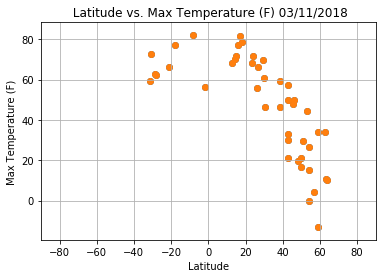

In [26]:
plt.show()

In [27]:
# latitude vs humidity (%)
plt.scatter(weather_df["Latitude"], 
            weather_df["Humidity"])
plt.title(f"Latitude vs. Humidity (%) {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)

plt.savefig("LatVsHumidity_percent.png")

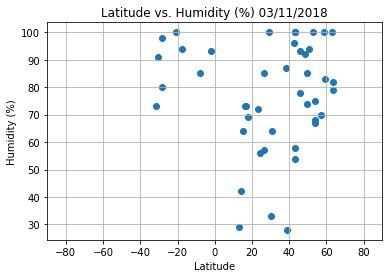

In [28]:
plt.show()

In [29]:
# latitude vs clouds (%)
plt.scatter(weather_df["Latitude"], 
            weather_df["Cloudiness"])
plt.title(f"Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)

plt.savefig("LatVsClouds_percent.png")

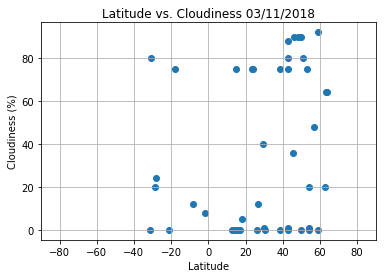

In [30]:
plt.show()

In [31]:
# latitude vs cloudiness (%)
plt.scatter(weather_df["Latitude"], 
            weather_df["Wind Speed"])
plt.title(f"Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)

plt.savefig("LatVsWinds_MPH.png")

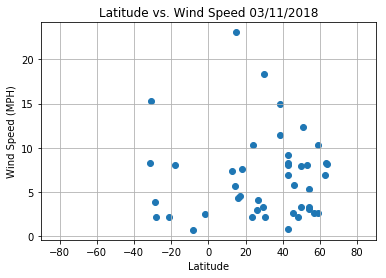

In [32]:
plt.show()